In [1]:
import json

import matplotlib.pyplot as plt

In [2]:
!ls ../results/*_classification_*

../results/2024-10-21_09-28-21_classification_finetuned_false:
config.json        model.safetensors  trainer_state.json training_args.bin

../results/2024-10-21_11-11-33_classification_finetuned_true:
config.json        model.safetensors  trainer_state.json training_args.bin


In [3]:
fine_tuned_model_name = "2024-10-21_11-11-33_classification_finetuned_true"
base_model_name = "2024-10-21_09-28-21_classification_finetuned_false"

fine_tuned_model_dir = f"../results/{fine_tuned_model_name}"
base_model_dir = f"../results/{base_model_name}"

In [4]:
file_path = f"{fine_tuned_model_dir}/trainer_state.json"

with open(file_path, "r") as f:
    trainer_state_fine_tuned = json.load(f)

file_path = f"{base_model_dir}/trainer_state.json"

with open(file_path, "r") as f:
    trainer_state_base = json.load(f)

In [5]:
plt.rcParams.update(
    {
        "font.size": 12,
        "font.family": "serif",
        "font.serif": ["Times New Roman"],
    }
)

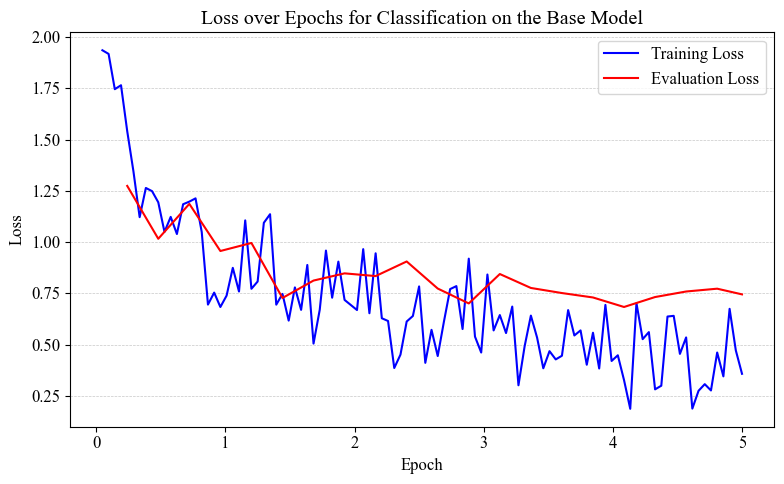

In [6]:
epochs_train = []
epochs_eval = []
train_losses = []
eval_losses = []

for entry in trainer_state_base["log_history"]:
    if "epoch" in entry:
        if "loss" in entry:
            epochs_train.append(entry["epoch"])
            train_losses.append(entry["loss"])
        if "eval_loss" in entry:
            epochs_eval.append(entry["epoch"])
            eval_losses.append(entry["eval_loss"])

plt.figure(figsize=(8, 5))

plt.plot(epochs_train, train_losses, label="Training Loss", linestyle="-", color="b")
plt.plot(epochs_eval, eval_losses, label="Evaluation Loss", linestyle="-", color="r")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs for Classification on the Base Model")

plt.grid(visible=True, axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

plt.legend()

plt.tight_layout()
plt.show()

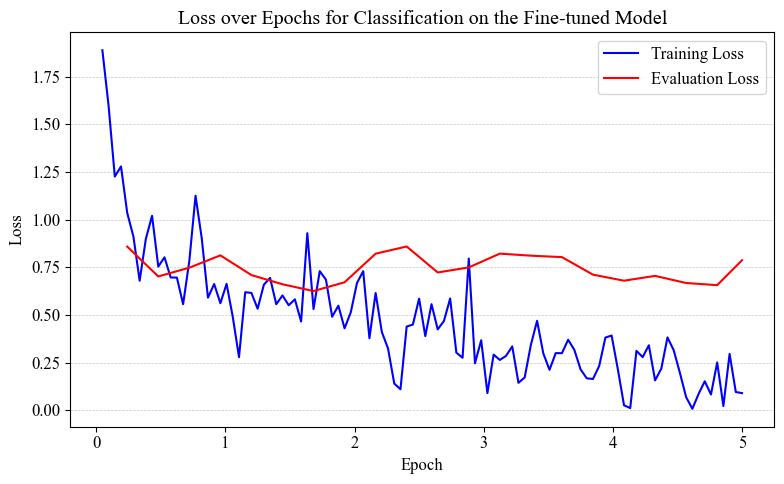

In [7]:
epochs_train = []
epochs_eval = []
train_losses = []
eval_losses = []

for entry in trainer_state_fine_tuned["log_history"]:
    if "epoch" in entry:
        if "loss" in entry:
            epochs_train.append(entry["epoch"])
            train_losses.append(entry["loss"])
        if "eval_loss" in entry:
            epochs_eval.append(entry["epoch"])
            eval_losses.append(entry["eval_loss"])

plt.figure(figsize=(8, 5))

plt.plot(epochs_train, train_losses, label="Training Loss", linestyle="-", color="b")
plt.plot(epochs_eval, eval_losses, label="Evaluation Loss", linestyle="-", color="r")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs for Classification on the Fine-tuned Model")

plt.grid(visible=True, axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

plt.legend()

plt.tight_layout()
plt.show()

In [8]:
def plot_property(
    trainer_state_fine_tuned, trainer_state_base, property, property_name
):
    base_epochs = []
    base_property = []
    tuned_epochs = []
    tuned_property = []

    for entry in trainer_state_fine_tuned["log_history"]:
        if "epoch" in entry and property in entry:
            tuned_epochs.append(entry["epoch"])
            tuned_property.append(entry[property])

    for entry in trainer_state_base["log_history"]:
        if "epoch" in entry and property in entry:
            base_epochs.append(entry["epoch"])
            base_property.append(entry[property])

    plt.figure(figsize=(8, 5))

    plt.plot(base_epochs, base_property, label="Base Model", linestyle="-", color="g")
    plt.plot(
        tuned_epochs, tuned_property, label="Fine-tuned Model", linestyle="-", color="m"
    )

    plt.xlabel("Epoch")
    plt.ylabel(property_name)
    plt.title(f"{property_name} over Epochs for Classification")

    plt.grid(visible=True, axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

    plt.legend()

    plt.tight_layout()
    plt.savefig(
        f"../results/{base_model_name.replace('_classification_finetuned_false', '')}_{property_name.lower()}.png"
    )
    plt.show()

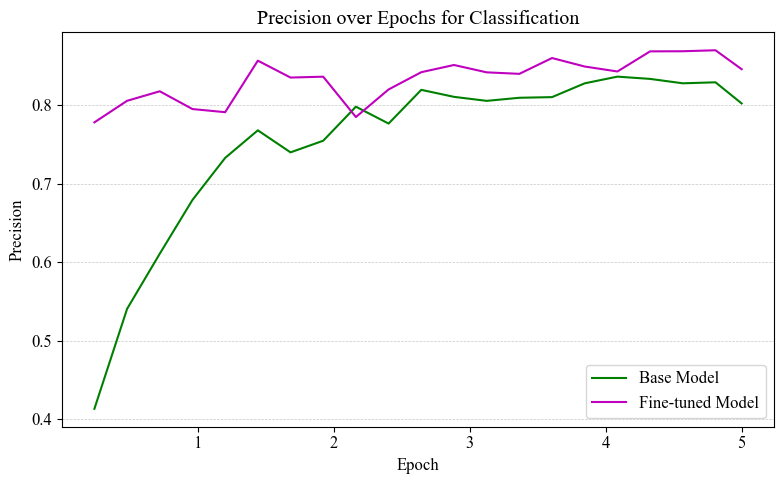

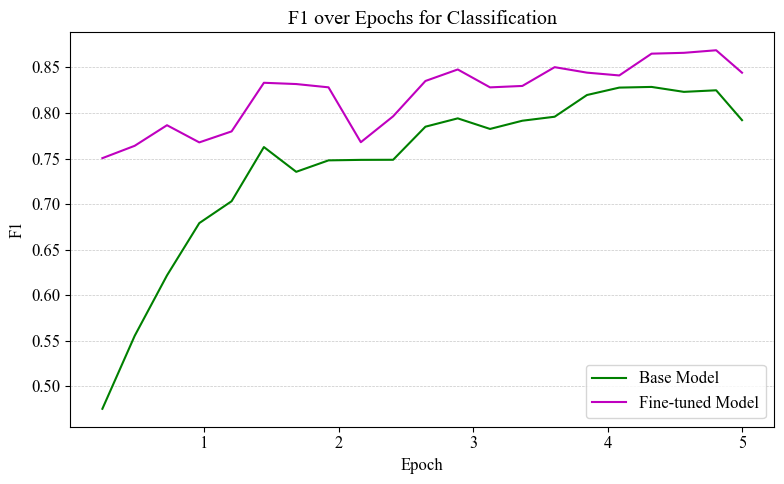

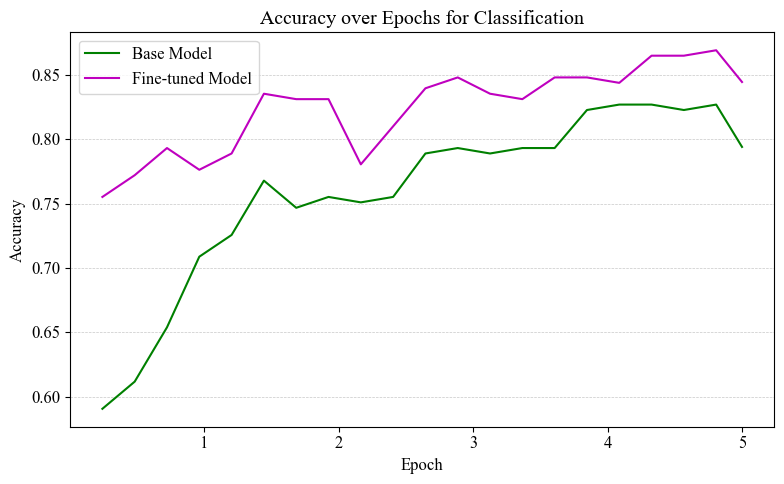

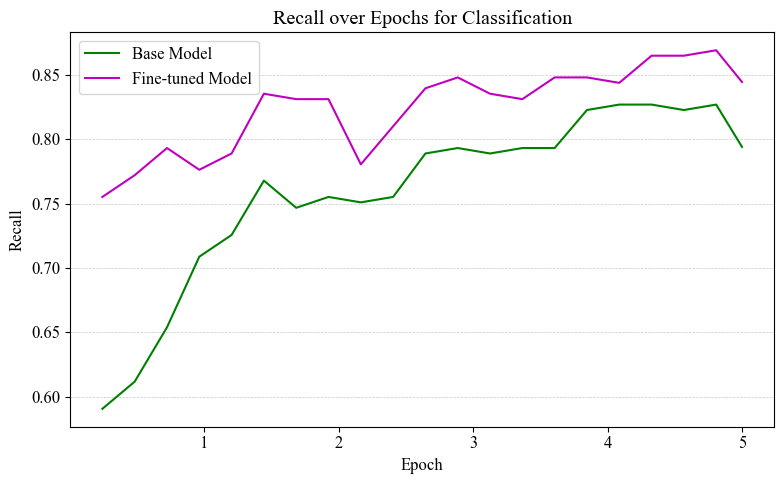

In [9]:
plot_property(
    trainer_state_fine_tuned, trainer_state_base, "eval_precision", "Precision"
)
plot_property(trainer_state_fine_tuned, trainer_state_base, "eval_f1", "F1")
plot_property(trainer_state_fine_tuned, trainer_state_base, "eval_accuracy", "Accuracy")
plot_property(trainer_state_fine_tuned, trainer_state_base, "eval_recall", "Recall")